# Ford GoBike System Data Exploration
## by Reinhold Mauch

## Preliminary Wrangling

This document explores data of the Ford GoBike Rental System. This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay Area. In the first part of the data exploration we're going to assess and clean the data so that it can be used for further investigation.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
bike_rentals = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
#display head of data
bike_rentals.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
bike_rentals.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#get descriptive statistics of numerical data
print(bike_rentals.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.00000

In [6]:
#what is in bike_share_for_all_trip?
bike_rentals.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [7]:
#what is in user_type
bike_rentals.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [8]:
bike_rentals[bike_rentals['member_birth_year'] < 1919]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.6270,2019-02-28 19:31:45.9670,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes
10827,1315,2019-02-27 19:21:34.4360,2019-02-27 19:43:30.0080,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No
16087,1131,2019-02-27 08:37:36.8640,2019-02-27 08:56:28.0220,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No
19375,641,2019-02-26 17:03:19.8550,2019-02-26 17:14:01.6190,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900.0,Male,No
21424,1424,2019-02-26 08:58:02.9040,2019-02-26 09:21:47.7490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,343.0,Bryant St at 2nd St,37.783172,-122.393572,5344,Subscriber,1900.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171996,1368,2019-02-03 17:33:54.6070,2019-02-03 17:56:42.9490,37.0,2nd St at Folsom St,37.785000,-122.395936,375.0,Grove St at Masonic Ave,37.774836,-122.446546,4988,Subscriber,1900.0,Male,No
173711,993,2019-02-03 09:45:30.4640,2019-02-03 10:02:04.1690,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,5445,Subscriber,1900.0,Male,No
177708,1527,2019-02-01 19:09:28.3870,2019-02-01 19:34:55.9630,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,5286,Subscriber,1900.0,Male,No
177885,517,2019-02-01 18:38:40.4710,2019-02-01 18:47:18.3920,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902.0,Female,No


In [9]:
#looking for duplicates
bike_rentals.duplicated().mean()

0.0

No duplicates in dataset. Let's look for null values.

In [10]:
#Columns with null values
cols_with_null_Values = bike_rentals.isnull().any()
cols_with_null_Values[cols_with_null_Values]

start_station_id      True
start_station_name    True
end_station_id        True
end_station_name      True
member_birth_year     True
member_gender         True
dtype: bool

In [11]:
#How many entries without station information
no_station_info = bike_rentals[bike_rentals[['start_station_id',
                            'start_station_name',
                            'end_station_id',
                            'end_station_name'
                           ]].isnull().any(axis=1)]
no_station_info.shape[0]

197

Since there are only 197 entries without station info, we're going to drop these later

Let's look at data with missing member birth date and gender

In [12]:
#How many entries without gender or year of birth information
no_birth_gender_info = bike_rentals[bike_rentals[['member_birth_year', 'member_gender']].isnull().any(axis=1)]
no_birth_gender_info.shape[0]

8265

In [13]:
#get the proportion of entries without birth/gender information
no_birth_gender_info.shape[0]/bike_rentals.shape[0]

0.04506248228033062

So this is about 4.5 % of the data. So let's have a look, if dropping these entries would affect rental duration.

In [14]:
print(bike_rentals[~bike_rentals[['member_birth_year', 'member_gender']].isnull().any(axis=1)][['duration_sec']].describe())

        duration_sec
count  175147.000000
mean      704.211845
std      1641.608363
min        61.000000
25%       323.000000
50%       510.000000
75%       789.000000
max     84548.000000


In [15]:
print(bike_rentals[['duration_sec']].describe())

        duration_sec
count  183412.000000
mean      726.078435
std      1794.389780
min        61.000000
25%       325.000000
50%       514.000000
75%       796.000000
max     85444.000000


Dropping the values would only slightly affect the data by ~20 seconds for mean rental time. We decide to drop them.

Let's have a look at the station fields. Are there differences for attributes of one station

In [16]:
#get number of start stations/start station names
print(bike_rentals[['start_station_id', 'start_station_name']].nunique())
#get number of combinations
print('Number of start station id / start station name combinations: {}'.format(bike_rentals.groupby(['start_station_id','start_station_name']).size().shape[0]))

start_station_id      329
start_station_name    329
dtype: int64
Number of start station id / start station name combinations: 329


In [17]:
bike_rentals.groupby(['start_station_id','start_station_latitude', 'start_station_longitude', 'start_station_name']).size().shape[0]

329

In [18]:
bike_rentals.groupby(['end_station_id','end_station_latitude', 'end_station_longitude', 'end_station_name']).size().shape[0]

329

So there are 329 stations in the dataset. From a tidiness aspect we would have to separate the station data in a different table. But as we use it later for comparison we decide to keep the data in the dataset.

In [19]:
#look at member gender
bike_rentals.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [20]:
#Look at user_type
bike_rentals.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

#### Cleaning the data

Copy data before cleaning

In [21]:
bike_rentals_clean = bike_rentals.copy()

First we're going to drop all the null value rows

In [22]:
bike_rentals_clean.dropna(inplace=True)

Now let's care for the datatypes. First wie want to know on which weekday a ride started.

In [23]:
#first convert start and end date to datetime
bike_rentals_clean['start_time'] = pd.to_datetime(bike_rentals_clean['start_time'])
bike_rentals_clean['end_time'] = pd.to_datetime(bike_rentals_clean['end_time'])

In [24]:
bike_rentals_clean.start_time.min(), bike_rentals_clean.end_time.max()

(Timestamp('2019-02-01 00:00:20.636000'),
 Timestamp('2019-03-01 08:01:55.975000'))

We're looking at the data of one month (February 2019).

In [25]:
#get week days
bike_rentals_clean['weekday_start'] = bike_rentals_clean['start_time'].dt.strftime('%A')

Now we add a start hour just to split the start times into daytime bins within a new column ride_time_daytime and drop the 
hour_start column afterwards

In [26]:
#get the start hour
bike_rentals_clean['hour_start'] = bike_rentals_clean['start_time'].dt.hour

In [27]:
#create new category ride_type_daytime and drop hour_start
bins=[-1 ,4, 10, 14 , 18, 21, 24]
ride_type_daytime_labels=['night', 'morning','mid-day','afternoon', 'evening', 'night_1']
bike_rentals_clean['ride_type_daytime']=pd.cut(x=bike_rentals_clean['hour_start'],bins=bins,labels=ride_type_daytime_labels)

bike_rentals_clean['ride_type_daytime'] = bike_rentals_clean['ride_type_daytime'].apply(lambda x: x.strip('_1'))
#drop hour_start
#bike_rentals_clean.drop('hour_start', axis=1, inplace=True)

In [28]:
#replace member_birth_year by user_age
bike_rentals_clean['member_age'] = (2019 - bike_rentals_clean['member_birth_year']).astype(int)
bike_rentals_clean[bike_rentals_clean['member_age'] > 100].member_age.value_counts().sort_index(ascending=False)
#drop year of birth
bike_rentals_clean.drop('member_birth_year', axis=1, inplace=True);

I decide to not care for ages above 100 years, as they seem very unlikely and decide to drop those rides

In [29]:
#drop age entries above 100 years
bike_rentals_clean = bike_rentals_clean[bike_rentals_clean['member_age'] <= 100]
bike_rentals_clean.member_age.describe()#

count    174880.000000
mean         34.162043
std           9.974001
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          99.000000
Name: member_age, dtype: float64

Additionally I decide to split ages into categories for later investigation


In [30]:
bins=[17,20,30,40,50,100]
age_labels=['<20','20s','30s','40s','50+']
bike_rentals_clean['age_level']=pd.cut(x=bike_rentals_clean['member_age'],bins=bins,labels=age_labels)


For better understanding we set the duration to minutes and drop the second column

In [31]:
bike_rentals_clean['duration_min'] = bike_rentals_clean['duration_sec'] / 60
bike_rentals_clean.drop('duration_sec', axis = 1, inplace = True)

Finally we also split ride duration into categories

In [32]:
bins=[bike_rentals_clean['duration_min'].min()-1,bike_rentals_clean['duration_min'].mean(),bike_rentals_clean['duration_min'].max()]
ride_type_duration_labels=['short','long']
bike_rentals_clean['ride_type_duration']=pd.cut(bike_rentals_clean['duration_min'],bins=bins,labels=ride_type_duration_labels)

In [33]:
#convert bike_share_for_all_trip into bool
bike_rentals_clean['bike_share_for_all_trip'] = bike_rentals_clean.bike_share_for_all_trip == 'Yes'

In [34]:
# convert member_gender, ride_type_daytime, user_type, weekday_start, weekday_end into categorical types

ordinal_var_dict = {'member_gender': ['Male','Female','Other'],
                    'ride_type_daytime': ['morning','mid-day','afternoon', 'evening', 'night'],
                    'weekday_start': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'age_level': age_labels,
                    'ride_type_duration': ride_type_duration_labels,
                   'user_type': ['Subscriber', 'Customer']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    bike_rentals_clean[var] = bike_rentals_clean[var].astype(ordered_var)

In [35]:
bike_rentals_clean.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,user_type,member_gender,bike_share_for_all_trip,weekday_start,hour_start,ride_type_daytime,member_age,age_level,duration_min,ride_type_duration
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,...,Customer,Male,False,Thursday,17,afternoon,35,30s,869.750000,long
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,...,Customer,Male,False,Thursday,12,mid-day,47,40s,1030.900000,long
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,...,Subscriber,Other,False,Thursday,17,afternoon,30,20s,608.166667,long
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,...,Subscriber,Male,True,Thursday,23,night,45,40s,26.416667,long
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,...,Subscriber,Male,False,Thursday,23,night,60,50+,29.883333,long


In [36]:
bike_rentals_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174880 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174880 non-null  datetime64[ns]
 1   end_time                 174880 non-null  datetime64[ns]
 2   start_station_id         174880 non-null  float64       
 3   start_station_name       174880 non-null  object        
 4   start_station_latitude   174880 non-null  float64       
 5   start_station_longitude  174880 non-null  float64       
 6   end_station_id           174880 non-null  float64       
 7   end_station_name         174880 non-null  object        
 8   end_station_latitude     174880 non-null  float64       
 9   end_station_longitude    174880 non-null  float64       
 10  bike_id                  174880 non-null  int64         
 11  user_type                174880 non-null  category      
 12  member_gender   

In [37]:
print(bike_rentals_clean.describe())

       start_station_id  start_station_latitude  start_station_longitude  \
count     174880.000000           174880.000000            174880.000000   
mean         138.978528               37.771207              -122.351759   
std          111.636735                0.100408                 0.117746   
min            3.000000               37.317298              -122.453704   
25%           47.000000               37.770407              -122.411901   
50%          104.000000               37.780760              -122.398279   
75%          239.000000               37.797320              -122.283093   
max          398.000000               37.880222              -121.874119   

       end_station_id  end_station_latitude  end_station_longitude  \
count   174880.000000         174880.000000          174880.000000   
mean       136.602573             37.771401            -122.351336   
std        111.332869              0.100312               0.117310   
min          3.000000             3

Store cleaned data

In [38]:
bike_rentals_clean.to_csv('ford_gobike_clean.csv')

### What is the structure of your dataset?

There are 174,880 FordGoBike bike share rides in the dataset. The data consists of following information for each ride:
* time information
    * timestamps for start and end of ride (start_time, end_time)
    * ride duration in minutes (duration_min)
    * weekday of ride start (weekday_start)
    * daytime of the ride (ride_type_daytime)
    * hour of the ride (hour_start)
    * type of ride - short (below mean ride time of dataset) , long (above mean ride time of dataset) (ride_type_duration)
  
* start and end station information(start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude)
* user information 
    * user type (user_type)
    * age of user (member_age)
    * age_category (age_level)
    * gender of user (member_gender)
    * information if user is enrolled in ["Bike Share for All"](https://www.bikeshareforall.org) program for people with low income (bike_share_for_all_trip)
* bike id (bike_id)

### What is/are the main feature(s) of interest in your dataset?

My feature of interest the ride frequency and which variables have an impact on it. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the time of the ride, the place and the weekday will have an affect on the frequency.

## Univariate Exploration

First I'm going to have a close look on my depending variable ride duration. So let's have a look on the distribution

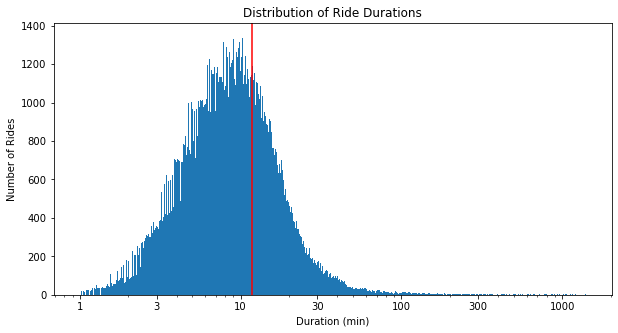

In [39]:
log_binsize = 0.005
log_bins = 10 ** np.arange(-0.005, np.log10(bike_rentals_clean['duration_min'].max()) + log_binsize, log_binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = bike_rentals_clean, x = 'duration_min', bins = log_bins)
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration (min)')
plt.ylabel('Number of Rides')
plt.xscale('log')
xticks = [1, 3, 10, 30, 100, 300, 1000]
plt.xticks(xticks, xticks)
plt.axvline(bike_rentals_clean.duration_min.mean(), color  = 'red')
plt.show()

As the distrubution is heavily right skewed I had to apply a log transformation on the x-axis. 
As we see here most trips are below 15 min and few above 30 min. The mean (red line) is around 12 min. There seem to be lots of outliers. So let's have a look at the box plot.

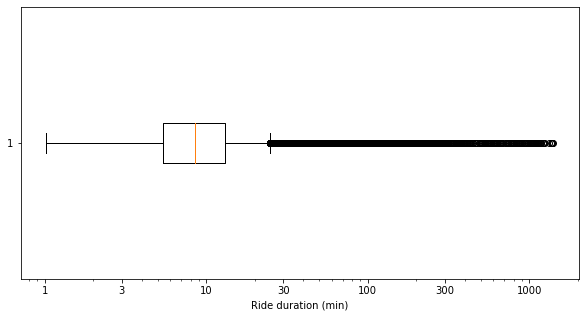

In [40]:
plt.figure(figsize=(10,5))
xticks = [1, 3, 10, 30, 100, 300, 1000]
plt.xscale('log')
plt.xticks(xticks, xticks)
plt.boxplot(bike_rentals_clean['duration_min'], vert=False )
plt.xlabel("Ride duration (min)");

As expected we see a lot of outliers outside of the right whisker. Again we see that most rides fall into a duration of up to around 10 minutes. As we ignore outliers here, the mean is reduced by around 2 min. We're having a look at outliers.

In [41]:
#get outliers by describe() function
desc_stat_dur_min = bike_rentals_clean.duration_min.describe()
iqr = desc_stat_dur_min['75%']-desc_stat_dur_min['25%']
pos_high_whisker = 1.5 * iqr + desc_stat_dur_min['75%']
#print number of outliers
print(pos_high_whisker)
bike_rentals_clean[bike_rentals_clean.duration_min > pos_high_whisker].shape[0]

24.8


9323

After having a look at the data we decide not to drop the outliers, because they still seem to be valid observations of the data.

In [42]:
#drop outliers
#bike_rentals_clean= bike_rentals_clean[bike_rentals_clean.duration_min <= pos_high_whisker]

In [43]:
#replot duration distribution
# plt.figure(figsize=(10, 12))
# base_color = sb.color_palette()[0]

# ax = plt.subplot(2, 1, 1)
# binsize = 0.25
# bins = np.arange(0, bike_rentals_clean['duration_min'].max() + binsize, binsize)
# plt.hist(data = bike_rentals_clean, x = 'duration_min', bins = bins)
# plt.title('Distribution of Ride Durations')
# plt.xlabel('Duration (min)')
# plt.ylabel('Number of Rides')
# #plt.xscale('log')
# xticks = [1, 5, 10, 15, 20, 25, 30]
# plt.xticks(xticks, xticks)
# plt.axvline(bike_rentals_clean.duration_min.mean(), color  = 'red')

# ax = plt.subplot(2, 1, 2)
# xticks = [1, 3, 10, 30, 100, 300, 1000]
# #plt.xscale('log')
# plt.xticks(xticks, xticks)
# plt.boxplot(bike_rentals_clean['duration_min'], vert=False )
# plt.xlabel("Ride duration (min)");

# plt.show()

Next I'm going to have at the distribution of my time dependent categorical variables weekday of ride, daytime of ride and number of short vs long ride.

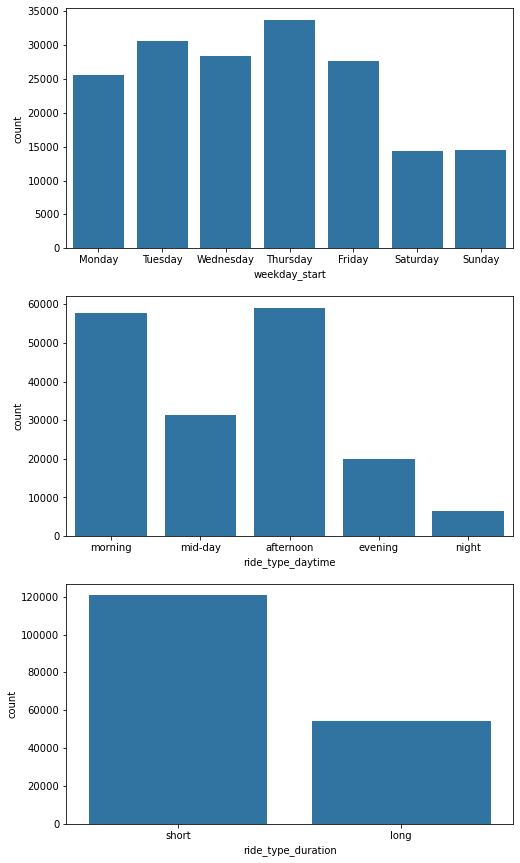

In [44]:
# let's plot all three together to get an idea of each variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [8,15])

default_color = sb.color_palette()[0]
sb.countplot(data = bike_rentals_clean, x = 'weekday_start', color = default_color, ax = ax[0])
sb.countplot(data = bike_rentals_clean, x = 'ride_type_daytime', color = default_color, ax = ax[1])
sb.countplot(data = bike_rentals_clean, x = 'ride_type_duration', color = default_color, ax = ax[2])

plt.show()

The first bar plot shows that rides are more frequent during the week (arount twice as much) and have a peak on Thursday.  
The second bar plot show that we have more rides during the day compared to evening or night. Ride numbers seem to drop around mid-day. Maybe we can look at this on a line plot.
The last bar plot shows that the amount of short rides is bigger compared to the amount of long rides. We already would have expected this as ride duration distribution is highly right skewed.

Let's draw the line plot for ride start



In [45]:
#get values by hour
start_hour_counts = bike_rentals_clean.groupby(bike_rentals_clean['hour_start']).size().reset_index().rename(columns = {0 : 'counts'})
#get top 2
start_hour_counts.sort_values(ascending = False, by=['counts']).head(2)

,hour_start,counts
17,17,20897
8,8,20218


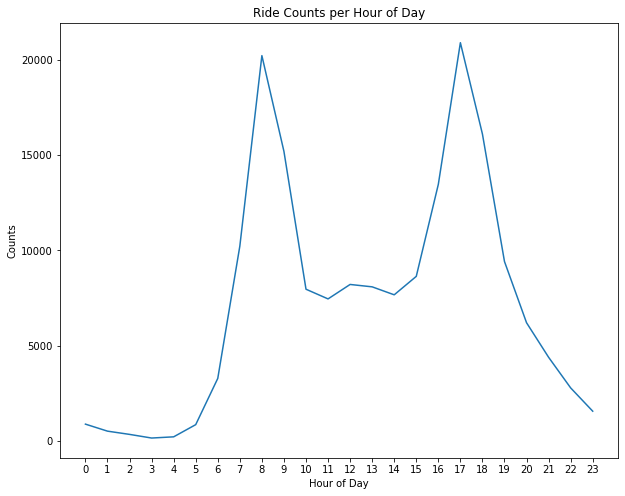

In [46]:
plt.figure(figsize = [10, 8])

sb.lineplot(x = start_hour_counts.hour_start, y = start_hour_counts.counts)
plt.xticks(range(0, 24, 1))
plt.xlabel('Hour of Day')
plt.ylabel('Counts')
plt.title('Ride Counts per Hour of Day')
plt.show()

In this plot we see a rising frequency of bike rides at starting hour 5 with a peak on starting hour 8 dropping down to about half rides around noon and then rising in the afternoon with another quite similar peak on hour 17h.

Now I'll have a look at my user based predictors User Type, Gender, Age and "Bike Share For All" Trips

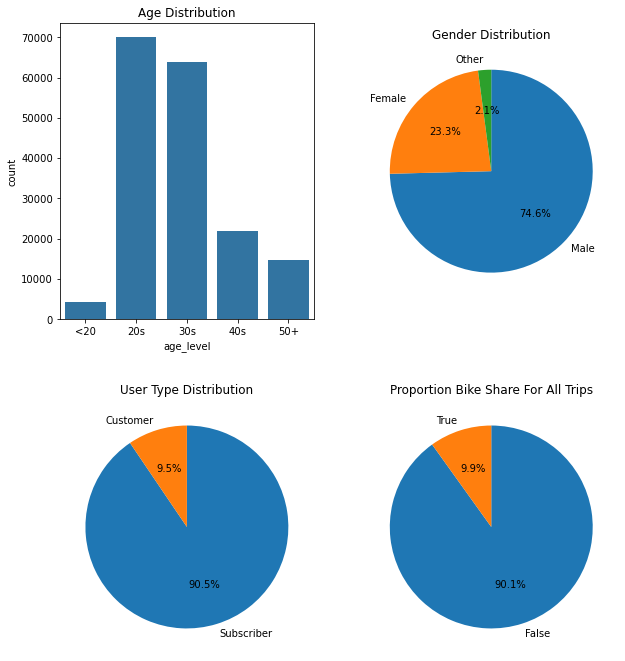

In [47]:
plt.figure(figsize=(10, 12))
base_color = sb.color_palette()[0]

ax = plt.subplot(2, 2, 1)
sb.countplot(data = bike_rentals_clean, x = 'age_level', color = base_color, ax = ax)
plt.title('Age Distribution')

ax = plt.subplot(2, 2, 2)
sorted_counts = bike_rentals_clean['member_gender'].value_counts()
my_index = sorted_counts.index
plt.pie(sorted_counts, labels = my_index, startangle = 90, counterclock = False, autopct = '%1.1f%%');
plt.title('Gender Distribution')

ax = plt.subplot(2, 2, 3)
sorted_counts = bike_rentals_clean['user_type'].value_counts()
my_index = sorted_counts.index
plt.pie(sorted_counts, labels = my_index, startangle = 90, counterclock = False, autopct = '%1.1f%%');
plt.title('User Type Distribution')

ax = plt.subplot(2, 2, 4)
sorted_counts = bike_rentals_clean['bike_share_for_all_trip'].value_counts()
my_index = sorted_counts.index
plt.pie(sorted_counts, labels = my_index, startangle = 90, counterclock = False, autopct = '%1.1f%%');
plt.title('Proportion Bike Share For All Trips')

plt.show()



The user based plots show that within the dataset most rides are conducted by users in the 20s and 30s.
Around 75% are male users, most users are subscribers (~90%) and the around 10% of the trips are "Bike Share for All" trips.

Finally we'll have a look at the distribution of stations according to the geo-position oft the start station.

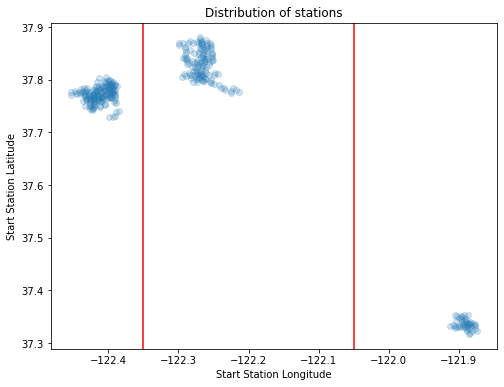

In [48]:
plt.figure(figsize = [8, 6])
df_start_stations = bike_rentals_clean[['start_station_id','start_station_longitude','start_station_latitude']].drop_duplicates()
df_start_stations
plt.scatter(data = df_start_stations, x = 'start_station_longitude', y = 'start_station_latitude', alpha = 1/5)
plt.xlabel('Start Station Longitude')
plt.ylabel('Start Station Latitude')
plt.title('Distribution of stations')
plt.axvline(-122.35, color  = 'red')
plt.axvline(-122.05, color  = 'red')
plt.show()

This plot indicates we have three different places in the dataset, where stations are located. According to the geo-position we're talking about San Francisco, Oakland and San Jose. Im going to ad the locations in a new category column.

In [49]:
#create new categories for location, location_end
bins=[-122.5 , -122.35, -122.05, -121.8]
location_labels=['San Francisco', 'Oakland','San Jose']
bike_rentals_clean['location']=pd.cut(x=bike_rentals_clean['start_station_longitude'],bins=bins,labels=location_labels)
bike_rentals_clean['location_end']=pd.cut(x=bike_rentals_clean['end_station_longitude'],bins=bins,labels=location_labels)

In [50]:
#look at rides with different start and end location
bike_rentals_clean[bike_rentals_clean.location != bike_rentals_clean.location_end]

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,bike_share_for_all_trip,weekday_start,hour_start,ride_type_daytime,member_age,age_level,duration_min,ride_type_duration,location,location_end
19827,2019-02-26 15:11:44.523,2019-02-26 15:48:54.373,227.0,Foothill Blvd at Fruitvale Ave,37.783757,-122.222603,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,...,True,Tuesday,15,afternoon,30,20s,37.150000,long,Oakland,San Francisco
50859,2019-02-21 17:51:18.986,2019-02-21 18:45:04.085,167.0,College Ave at Harwood Ave,37.848152,-122.252160,22.0,Howard St at Beale St,37.789756,-122.394643,...,True,Thursday,17,afternoon,31,30s,53.750000,long,Oakland,San Francisco
85529,2019-02-17 12:38:50.477,2019-02-17 15:08:08.352,163.0,Lake Merritt BART Station,37.797320,-122.265320,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,...,True,Sunday,12,mid-day,44,40s,149.283333,long,Oakland,San Francisco
87602,2019-02-17 00:27:13.613,2019-02-17 01:40:11.883,9.0,Broadway at Battery St,37.798572,-122.400869,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,...,False,Sunday,0,night,26,20s,72.966667,long,San Francisco,Oakland
89787,2019-02-16 14:15:06.336,2019-02-16 14:45:06.488,201.0,10th St at Fallon St,37.797673,-122.262997,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,...,True,Saturday,14,mid-day,44,40s,30.000000,long,Oakland,San Francisco
112038,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,300.0,Palm St at Willow St,37.317298,-121.884995,...,False,Tuesday,14,mid-day,34,30s,115.750000,long,San Francisco,San Jose
121514,2019-02-11 14:39:16.299,2019-02-11 15:09:09.130,230.0,14th St at Mandela Pkwy,37.810743,-122.291415,223.0,16th St Mission BART Station 2,37.764765,-122.420091,...,False,Monday,14,mid-day,31,30s,29.866667,long,Oakland,San Francisco
153112,2019-02-06 13:05:00.691,2019-02-06 13:41:57.678,219.0,Marston Campbell Park,37.809824,-122.280192,134.0,Valencia St at 24th St,37.752428,-122.420628,...,True,Wednesday,13,mid-day,30,20s,36.933333,long,Oakland,San Francisco
161775,2019-02-05 13:14:18.246,2019-02-05 13:53:35.665,201.0,10th St at Fallon St,37.797673,-122.262997,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,...,True,Tuesday,13,mid-day,44,40s,39.283333,long,Oakland,San Francisco


In [51]:
#Since I will try to distinguish between location data later I decide to drop those entries
bike_rentals_clean = bike_rentals_clean[bike_rentals_clean.location == bike_rentals_clean.location_end]
#drop end column
bike_rentals_clean.drop(columns=['location_end'], inplace=True)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

We learned that the distribution of ride durations is highly skewed to the ride. I had to perform a log transformation on  the x-axis to get a better idea of the distribution. Later I decided not to drop the more than 9000 outliers since they were no single points in space but around 9000 that seemed to be valid observation on first glance.

We learned that ride frequency is significantly higher during the week compared to weekends. 
As interesting fact I found out that there is a bimodal distribution of ride frequency during the day with peaks at morning and in the afternoon. Generally the number of short rides up to around 12 min is considerably higher than that of longer rides.

The exploration of user related data brought up following details:
* About 75% of the ride users in the dataset are male
* Most of the users are in their 20s or 30s
* About 90% of the users are subscribers
* About 90% of the rides are not "Bike Share For All" trips.

Looking at the distribution of stations according to their geocoordinate told me that there are 3 different bike sharing networks within the data (perhaps 3 different cities).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Most of the data cleaning was already done before analysis. As I told before I decided not to remove outliers from the data.

## Bivariate Exploration

First I'd like to have a look at the correlation plot for numeric data.


In [52]:
numeric_vars = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'hour_start', 'member_age', 'duration_min']
categoric_vars = ['user_type', 'member_gender', 'weekday_start', 'ride_type_daytime', 'age_level', 'ride_type_duration']

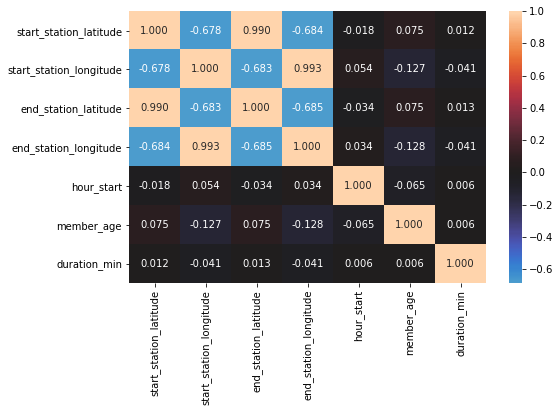

In [53]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_rentals_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'icefire', center = 0)
plt.show()

As already expected there doesn't seem to be an unexpected linear correlation here. Of course station latitudes and longitudes have a significant correlation.

Now let's have a look at combinations of categorical variable and the distribution of rides

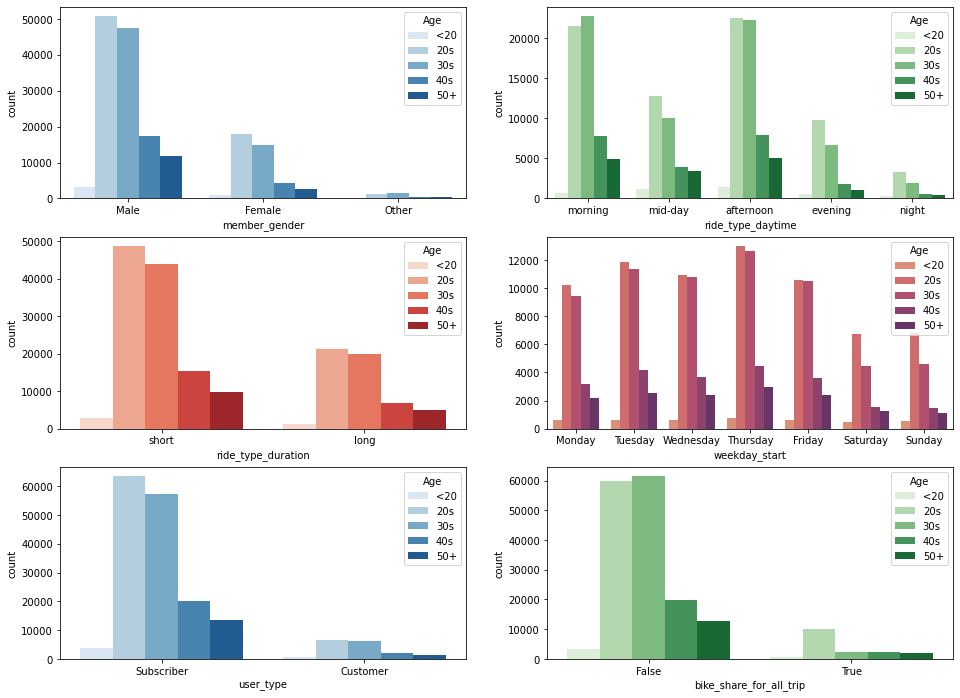

In [54]:
plt.figure(figsize = [16, 12])

# subplot 1: gender and age_level
ax = plt.subplot(3, 2, 1)
sb.countplot(data = bike_rentals_clean, x = 'member_gender', hue = 'age_level', palette = 'Blues')
ax.legend(title="Age")

# subplot 2: ride_type_daytime and age_level
ax = plt.subplot(3, 2, 2)
sb.countplot(data = bike_rentals_clean, x = 'ride_type_daytime', hue = 'age_level', palette = 'Greens')
ax.legend(title="Age")

# subplot 3: ride_type_duration and age_level
ax = plt.subplot(3, 2, 3)
sb.countplot(data = bike_rentals_clean, x = 'ride_type_duration', hue = 'age_level', palette = 'Reds')
ax.legend(title="Age")

# subplot 4: weekday and age_level
ax = plt.subplot(3, 2, 4)
sb.countplot(data = bike_rentals_clean, x = 'weekday_start', hue = 'age_level', palette = 'flare')
ax.legend(title="Age")
 
# subplot 5: user type and age_level
ax = plt.subplot(3, 2, 5)
sb.countplot(data = bike_rentals_clean, x = 'user_type', hue = 'age_level', palette = 'Blues')
ax.legend(title="Age")


# subplot 6: bike share for all trip and age_level
ax = plt.subplot(3, 2, 6)
sb.countplot(data = bike_rentals_clean, x = 'bike_share_for_all_trip', hue = 'age_level', palette = 'Greens')
ax.legend(title="Age")

plt.show()

Looking at the distributions related to age and the other categorical values, we can observe:
* Males and females (ignoring "Other" due to small numbers) have the same age structure like the overall age structure
* The mean age of users is higher on mornings or afternoon compared to mid-day, evening and night
* Users with longer ride duration are slightly older on average
* Users on weekends are younger on avarage compared to weekdays
* Subscribers are younger than ad-hoc customers on average
* Users enrolled in the 'bike share for all' program are mainly in their 20s

Since there is interesting correlation between age and weekday I'm going to have a look if this also has an affect on other variables. For duration on weekday I decide to use a violin plot. Since there is a steep drop in ride numbers around 30 min I'm going to set a border on 40 min.

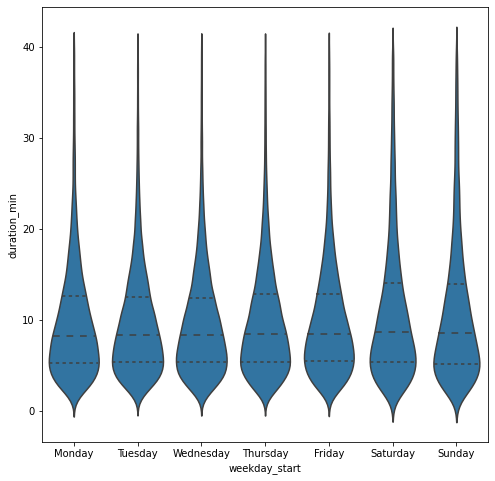

In [55]:
base_color = sb.color_palette()[0]

plt.figure(figsize=(8, 8))
plot_data = bike_rentals_clean[bike_rentals_clean.duration_min <= 40]
sb.violinplot( x = plot_data.weekday_start, y = plot_data.duration_min, color = base_color, inner='quartile' );

Here we see that there are more longer rides on weekends (3rd quartile) though the mean ride time doesn't significantly change. Let's have a look on different location based on weekday.

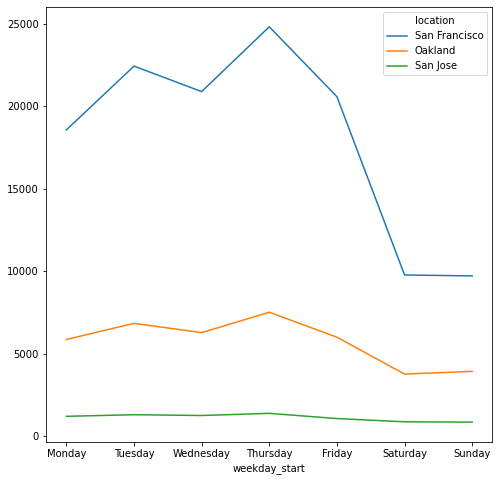

In [56]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
bike_rentals_clean.groupby(['weekday_start', 'location']).size().unstack().plot(ax = ax);

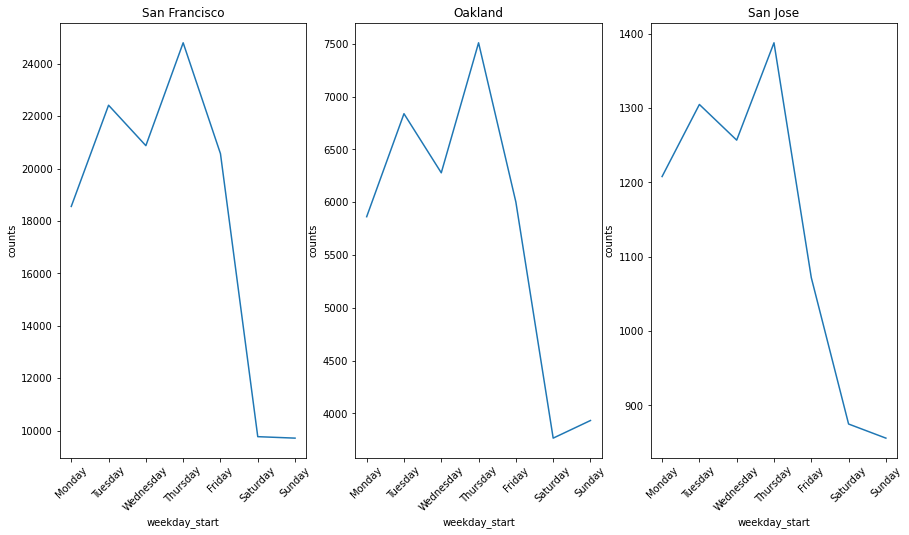

In [57]:
#plot again to better see user drop on weekends
fig, ax = plt.subplots(ncols = 3, nrows = 1 , figsize = [15,8])
location_values = ['San Francisco', 'Oakland', 'San Jose']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


for i in range(len(location_values)):
    var = location_values[i]
    plot_data = bike_rentals_clean[bike_rentals_clean.location == var]
    weekdays_counts = plot_data.groupby(plot_data['weekday_start']).size().reset_index().rename(columns = {0 : 'counts'})
    sb.lineplot(x = weekdays_counts.weekday_start, y = weekdays_counts.counts, ax = ax[i])
    ax[i].set_xticks(np.arange(7))
    ax[i].set_xticklabels(weekdays, rotation=45)
    ax[i].set_title(var)

plt.show()

What we see here is that all three locations have a significant decline of rides on weekends, though location_1 has the majority of the rides.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

According to my observations, my feature of interest "ride frequency" varied based on weekday and user age and also based on day of time and user age. In the univariate exploration we observed a decline of rides on weekends and during the day around noon. Here we also saw that user age is higher on average when ride frequency is high.  
We also observed that the ride frequency is on different days of the week looks similar in all three identified locations.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Things we observed in addition:
* Males and females (ignoring "Other" due to small numbers) have the same age structure like the overall age structure
* Users with longer ride duration are slightly older on average
* Subscribers are younger than ad-hoc customers on average
* Users enrolled in the 'bike share for all' program are mainly in their 20s
* there are more longer rides on weekends

## Multivariate Exploration

In this part of the exploration I'd like to have a closer look on ride frequencies depending on location, part of the week (weekend, weekdays) and rental station. First we're using feature engineering to add a column for separating weekends and weekdays.

In [58]:
#add new category weekend, weekdays
bike_rentals_clean['part_of_week'] = bike_rentals_clean.apply(
    lambda x: ("weekend" if (x.weekday_start in ['Saturday', 'Sunday']) else 'weekdays'), axis = 1)
bike_rentals_clean.part_of_week.value_counts()

weekdays    145959
weekend      28912
Name: part_of_week, dtype: int64

Now we're going to calculate the proportions of rides depending on the starting hour, separated by part of the week and location.

In [59]:
#get values by hour
start_hour_counts = bike_rentals_clean.groupby(['part_of_week', 'hour_start','location']).size().reset_index().rename(columns = {0 : 'counts'})
#get proportions instead of counts
start_hour_counts_totals = start_hour_counts.groupby(['location', 'part_of_week'])['counts'].sum()
start_hour_counts['proportion'] = start_hour_counts.apply(lambda x: (x.counts / start_hour_counts_totals[x.location][x.part_of_week]), axis = 1)

In [60]:
start_hour_counts.head(5)

,part_of_week,hour_start,location,counts,proportion
0,weekdays,0,San Francisco,285,0.002658
1,weekdays,0,Oakland,198,0.006093
2,weekdays,0,San Jose,44,0.007063
3,weekdays,1,San Francisco,141,0.001315
4,weekdays,1,Oakland,93,0.002862


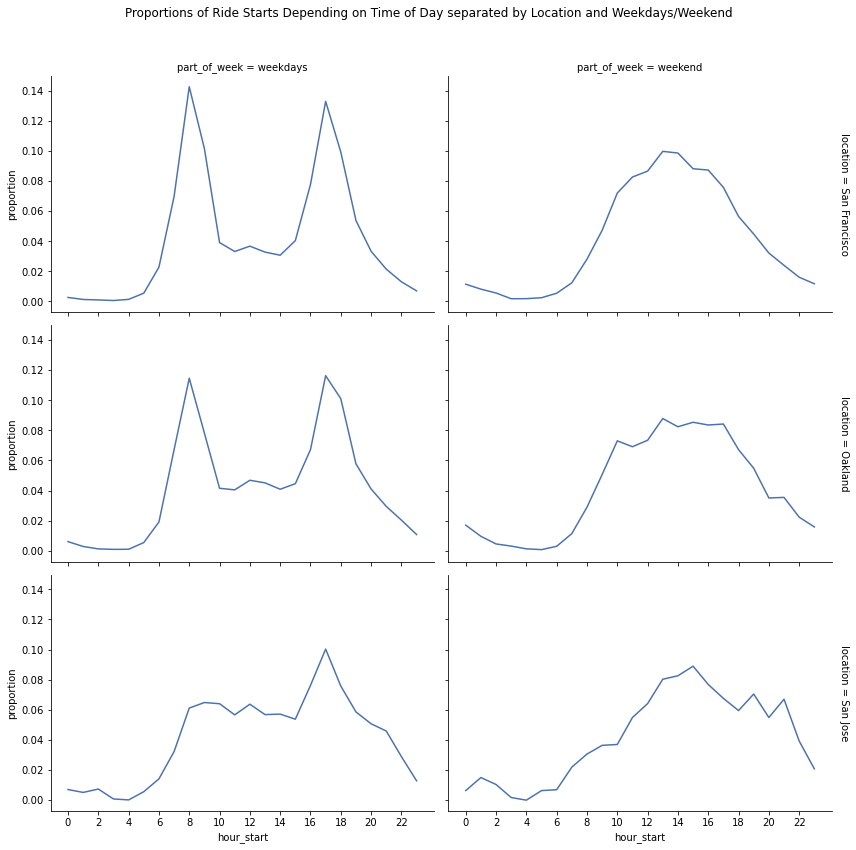

In [61]:
sb.set_palette('deep')
base_color = sb.color_palette()[0]
ticks = np.arange(0, 23, 2)

g = sb.FacetGrid(data=start_hour_counts, col='part_of_week', row='location', height=4, aspect = 1.5, margin_titles = True)
g = g.map(sb.lineplot,'hour_start', 'proportion', color=base_color)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Proportions of Ride Starts Depending on Time of Day separated by Location and Weekdays/Weekend');


for ax in g.axes.flatten():
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    

This is interesting. If we compare the locations and have a look at ride times depending on ride starting hours, we see that distributions on weekends strongly differ from distributions on weekdays. In two of the three locations of the dataset we clearly see a bimodal distribution. In our third location only the second peak in the afternoon is clearly visible.
On weekends however we have an unimodal distribution in all three locations with a peak in the early afternoon.

Another thing I'm interested in is the frequency depending on station location and time of day. I'm going to have a look at the location with the majority of rides - San Francisco. 
Additionally I'll have a look at ride starting and ending stations to see if there is some sort of movement pattern.  
One more thing, I'm going to reduce the data to only show weekdays, this is the movement I'm interested in. And I'm going to define categories of ride frequencies depending on absolute numbers of rides.

In [62]:
#getting bins based on descriptive statistics of field
def getStandardBins(df, col):
    desc_stat = df[col].describe()
    return [desc_stat['min']-1, desc_stat['25%'], desc_stat['50%'], desc_stat['75%'], desc_stat['max']] 

In [63]:
# calculating the data to be plotted

ride_cat_labels = ['low', 'low-mid', 'mid-high', 'high']

plot_data = bike_rentals_clean[(bike_rentals_clean.location == 'San Francisco') & (bike_rentals_clean.part_of_week == 'weekdays')]

plot_data_start = plot_data.groupby(['ride_type_daytime',
                               'start_station_longitude',
                               'start_station_latitude']).size().reset_index().rename(columns={0:'counts'})
plot_data_start = plot_data_start[plot_data_start.counts > 0]
plot_data_start['ride_frequency'] = pd.cut(plot_data_start['counts'], bins = getStandardBins(plot_data_start, 'counts'), labels = ride_cat_labels)
plot_data_start['station_type'] = "start_station"
plot_data_start.rename(columns={'start_station_longitude':'station_longitude', 'start_station_latitude':'station_latitude'}, inplace=True)

plot_data_end = plot_data.groupby(['ride_type_daytime',
                                 'end_station_longitude',
                                 'end_station_latitude']).size().reset_index().rename(columns={0:'counts'})
plot_data_end = plot_data_end[plot_data_end.counts > 0]
plot_data_end['ride_frequency'] = pd.cut(plot_data_end['counts'], bins = getStandardBins(plot_data_end, 'counts'), labels = ride_cat_labels)
plot_data_end['station_type'] = "end_station"
plot_data_end.rename(columns={'end_station_longitude':'station_longitude', 'end_station_latitude':'station_latitude'}, inplace=True);


plot_data_concat = plot_data_start.append(plot_data_end)

In [64]:
#look at my bins
print(getStandardBins(plot_data_start, 'counts'))

[0.0, 30.0, 74.0, 176.0, 1883.0]


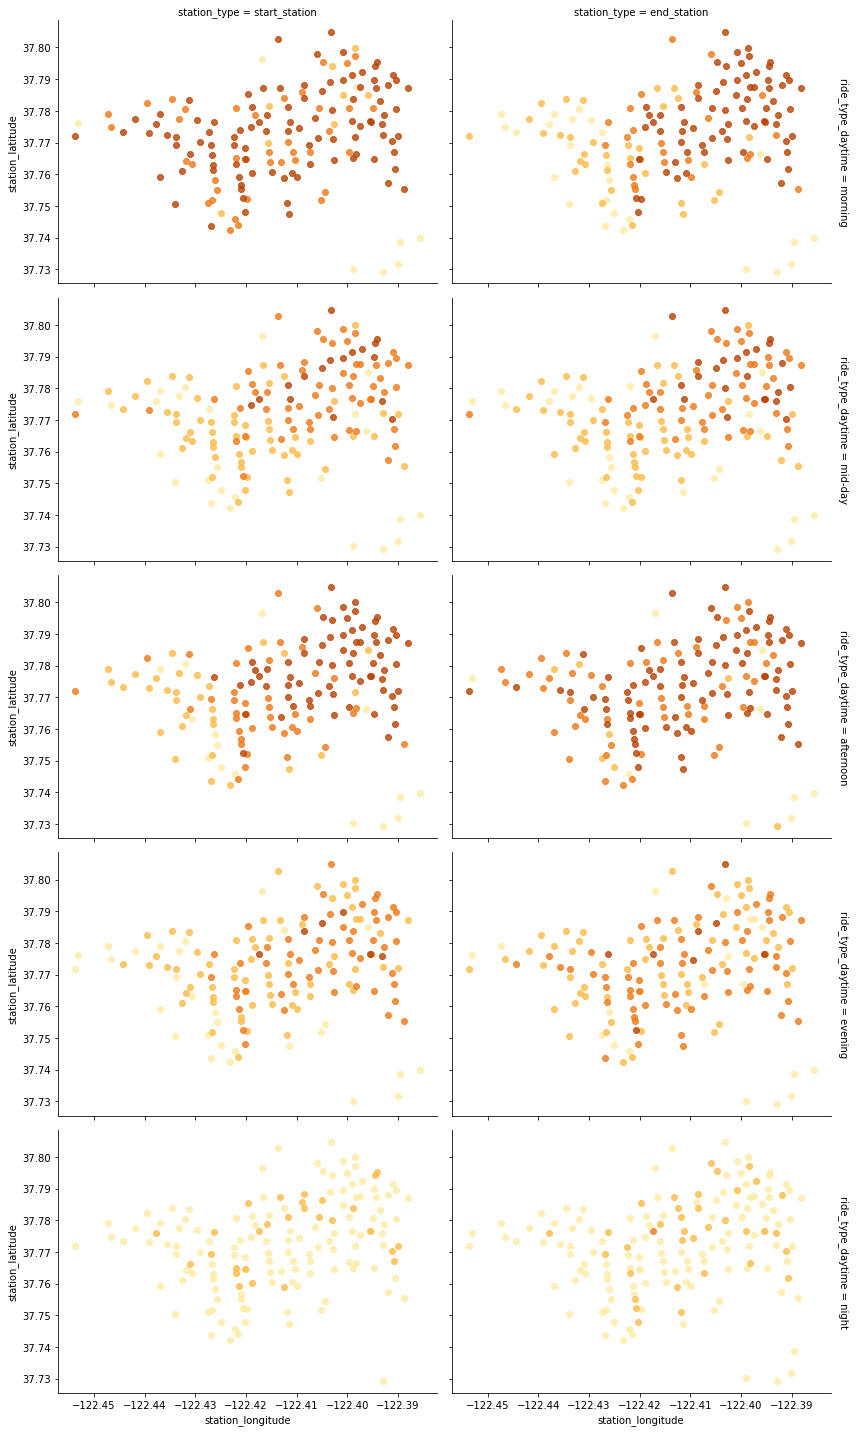

In [65]:
#plotting the facet grid
g = sb.FacetGrid(data=plot_data_concat, 
                 row='ride_type_daytime', col='station_type', hue ='ride_frequency', 
                 height=4, aspect = 1.5, margin_titles = True, palette = 'YlOrBr')
sb.set_palette('Reds')
g = g.map(sb.regplot,'station_longitude', 'station_latitude', fit_reg = False)

This facet grid shows that in the morning there is a center of bike arrivals located in the north east of our location. 
Also we see a center of bike ride start in the same area in the afternoon. And of course we see a higher number of bike rides during the day, especially in the morning and afternoon.

Since my expected movement pattern is not as clearly visible as I like it to have I'm going to look at the data with a different view. Now I'm going to calculate the proportion of rides of each station related to all rides of the station depending on the daytime.

In [66]:
station_info_counts_totals = plot_data_concat.groupby(['station_latitude', 'station_longitude'])['counts'].sum()
plot_data_concat['proportion'] = plot_data_concat.apply(lambda x: (x.counts /
                            station_info_counts_totals[x.station_latitude]
                            [x.station_longitude]), axis = 1)
#re-calculate ridefrequency based on proportions
plot_data_concat['ride_frequency_on_proportions'] = pd.cut(plot_data_concat['proportion'], bins = len(ride_cat_labels), labels = ride_cat_labels)

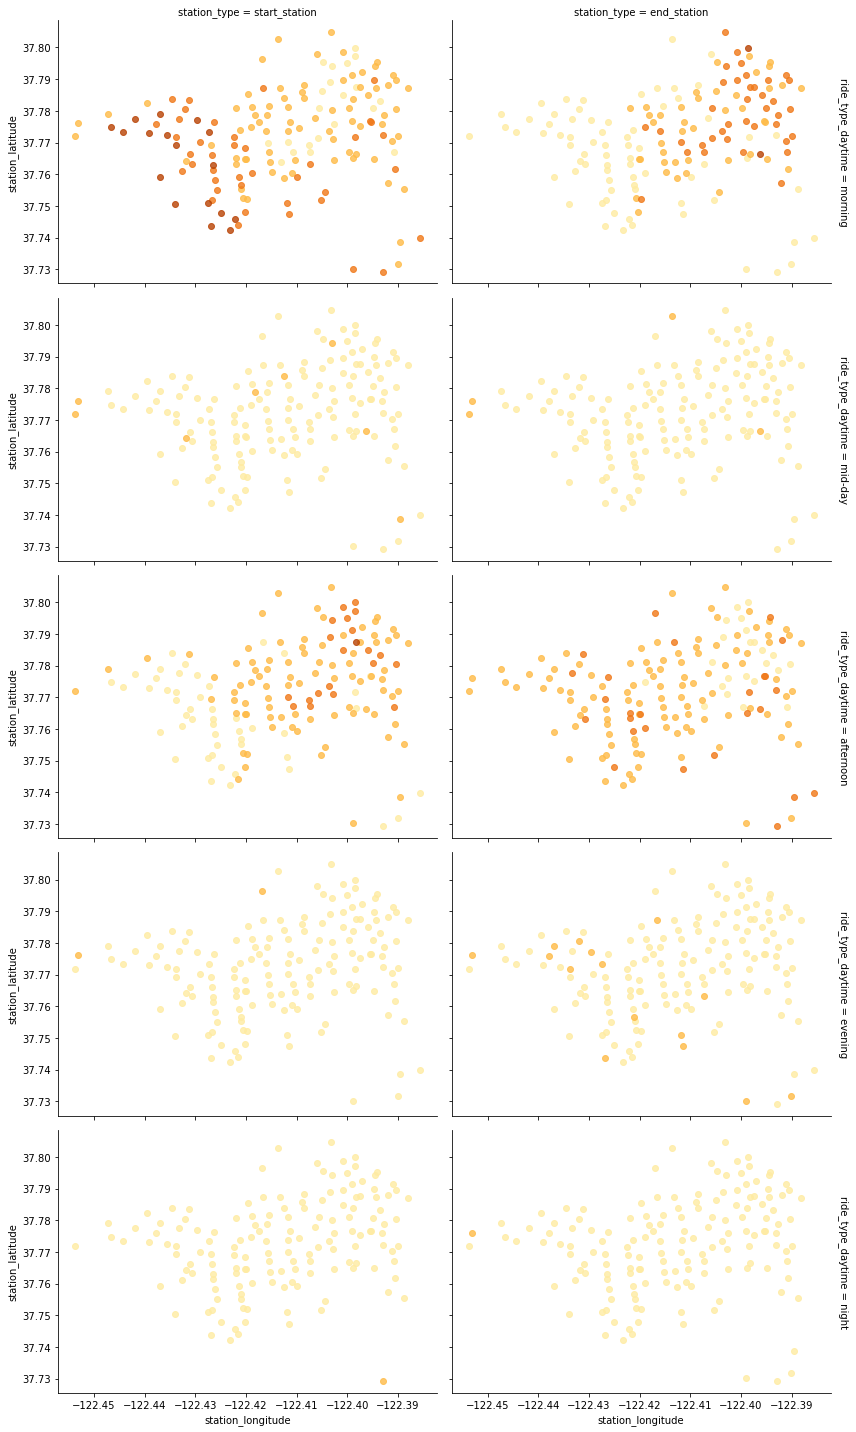

In [67]:
g = sb.FacetGrid(data=plot_data_concat, 
                 row='ride_type_daytime', col='station_type', hue ='ride_frequency_on_proportions', 
                 height=4, aspect = 1.5, margin_titles = True, palette = 'YlOrBr')
sb.set_palette('Reds')
g = g.map(sb.regplot,'station_longitude', 'station_latitude', fit_reg = False)

Here we clearly see a movement pattern from South-West to the North-East in the morning and the other way round in the afternoon. We even see late arrivers on the evening. Around noon and in the night there is noteworthy distribution difference between stations visible.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

This last part brought up some really interresting insights into the dataset. Obviously there is a big difference between bike ride frequency on weekends compared to weekdays when looking on distribution of rides during the day. Generally we see a bimodal intraday ride distribution on weekdays with peaks in the morning and afternoon. On weekends however we have an unimodal distribution with its peak in the afternoon. 

### Were there any interesting or surprising interactions between features?

I found out that there is a movement pattern during the day when looking at ride frequencies of leaving and arriving rides for every single station. All in all the dataset seems to show a commuter pattern.